In [61]:
# 导入相关模块
import sklearn.datasets as skdata
import matplotlib.pyplot as plt
# 画图
import seaborn as sns
import pandas as pd
import numpy as np
# 导入模型
# 交叉验证
from sklearn.model_selection import cross_val_score
# 决策树
from sklearn.tree import DecisionTreeRegressor
# 导入图
from sklearn.tree import export_graphviz
import graphviz
# 划分数据集
import sklearn.model_selection as skmodel
# 选择线性模型
import sklearn.linear_model as sklinear
# 特征处理，标准化
import sklearn.preprocessing as skprep
# 性能度量
import sklearn.metrics as skmetrics

In [62]:
df = pd.read_csv('郑州高新区数据.csv','|')
df = df.drop(columns = ['城市','区域'])

E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\mat

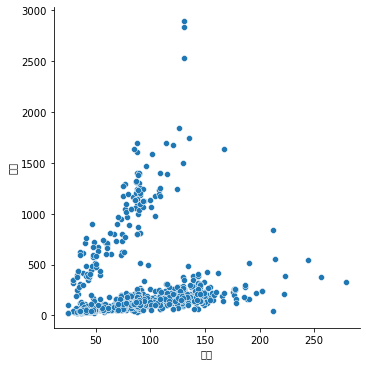

In [63]:
sns.relplot(x='面积', y='房价', data=df)

In [64]:
tezheng = [
        ['面积','房价'],
        ['面积','朝向_东', '朝向_北', '朝向_南', '朝向_西','房价'],
        ['面积','朝向_东', '朝向_北', '朝向_南', '朝向_西','装修_毛坯', '装修_简装','装修_精装','房价'],
        ['面积', '楼层', '朝向_东', '朝向_北', '朝向_南', '朝向_西', '装修_毛坯', '装修_简装',
        '装修_精装', '板塔_塔楼', '板塔_板塔结合', '板塔_板楼', '房价'],
        ]

In [65]:
df = df[tezheng[3]]
df

,面积,楼层,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,87.27,34,0,0,1,0,0,0,1,0,0,1,130.0
1,131.03,27,0,0,1,0,0,0,1,0,1,0,255.0
2,128.21,34,0,0,1,0,0,0,1,0,0,1,165.0
3,87.74,7,0,0,1,0,0,1,0,0,0,1,136.0
4,90.65,32,0,0,1,0,0,0,1,0,1,0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,45.87,18,0,0,1,0,0,0,1,0,0,1,200.0
2229,120.53,32,0,0,1,0,0,1,0,0,1,0,210.0
2230,120.53,9,0,0,0,1,0,1,0,0,0,1,60.0
2231,120.53,20,0,0,1,0,0,0,1,0,1,0,68.0


In [66]:
df = df[-(df['房价']>=300)]
df

,面积,楼层,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,87.27,34,0,0,1,0,0,0,1,0,0,1,130.0
1,131.03,27,0,0,1,0,0,0,1,0,1,0,255.0
2,128.21,34,0,0,1,0,0,0,1,0,0,1,165.0
3,87.74,7,0,0,1,0,0,1,0,0,0,1,136.0
4,90.65,32,0,0,1,0,0,0,1,0,1,0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,45.87,18,0,0,1,0,0,0,1,0,0,1,200.0
2229,120.53,32,0,0,1,0,0,1,0,0,1,0,210.0
2230,120.53,9,0,0,0,1,0,1,0,0,0,1,60.0
2231,120.53,20,0,0,1,0,0,0,1,0,1,0,68.0


In [67]:
df = df.dropna()
df

,面积,楼层,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,87.27,34,0,0,1,0,0,0,1,0,0,1,130.0
1,131.03,27,0,0,1,0,0,0,1,0,1,0,255.0
2,128.21,34,0,0,1,0,0,0,1,0,0,1,165.0
3,87.74,7,0,0,1,0,0,1,0,0,0,1,136.0
4,90.65,32,0,0,1,0,0,0,1,0,1,0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228,45.87,18,0,0,1,0,0,0,1,0,0,1,200.0
2229,120.53,32,0,0,1,0,0,1,0,0,1,0,210.0
2230,120.53,9,0,0,0,1,0,1,0,0,0,1,60.0
2231,120.53,20,0,0,1,0,0,0,1,0,1,0,68.0


In [68]:
# 恢复划分数据后的索引
for i in [df]:
    i.index=range(i.shape[0])
df

,面积,楼层,朝向_东,朝向_北,朝向_南,朝向_西,装修_毛坯,装修_简装,装修_精装,板塔_塔楼,板塔_板塔结合,板塔_板楼,房价
0,87.27,34,0,0,1,0,0,0,1,0,0,1,130.0
1,131.03,27,0,0,1,0,0,0,1,0,1,0,255.0
2,128.21,34,0,0,1,0,0,0,1,0,0,1,165.0
3,87.74,7,0,0,1,0,0,1,0,0,0,1,136.0
4,90.65,32,0,0,1,0,0,0,1,0,1,0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,45.87,18,0,0,1,0,0,0,1,0,0,1,200.0
2068,120.53,32,0,0,1,0,0,1,0,0,1,0,210.0
2069,120.53,9,0,0,0,1,0,1,0,0,0,1,60.0
2070,120.53,20,0,0,1,0,0,0,1,0,1,0,68.0


E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 25151 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 20215 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38754 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\Anaconda3\lib\site-packages\mat

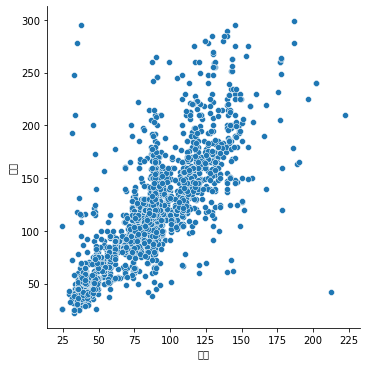

In [69]:
sns.relplot(x='面积', y='房价', data=df)

In [70]:
X = df.drop(columns = '房价')
y = df['房价']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2072 entries, 0 to 2071
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   面积       2072 non-null   float64
 1   楼层       2072 non-null   int64  
 2   朝向_东     2072 non-null   int64  
 3   朝向_北     2072 non-null   int64  
 4   朝向_南     2072 non-null   int64  
 5   朝向_西     2072 non-null   int64  
 6   装修_毛坯    2072 non-null   int64  
 7   装修_简装    2072 non-null   int64  
 8   装修_精装    2072 non-null   int64  
 9   板塔_塔楼    2072 non-null   int64  
 10  板塔_板塔结合  2072 non-null   int64  
 11  板塔_板楼    2072 non-null   int64  
 12  房价       2072 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 210.6 KB


In [71]:
x_train, x_test, y_train, y_test = skmodel.train_test_split(X , y , random_state=22)

In [72]:
# 恢复划分数据后的索引
for i in [x_train,x_test,y_train,y_test]:
    i.index=range(i.shape[0])
x_test
y_test

0       71.0
1      165.0
2      105.0
3      125.0
4      145.0
       ...  
513    246.0
514    196.0
515    149.0
516    120.0
517    132.0
Name: 房价, Length: 518, dtype: float64

In [73]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [74]:
y_predict = regressor.predict(x_test)

In [75]:
score = regressor.score(x_test, y_test)
score

0.3774475310976284

In [81]:
lin_mse = skmetrics.mean_squared_error(y_test,y_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

37.7518505269055